In [110]:
!pip install --upgrade scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 70.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: sklearn-compat
    Found existing installation: sklearn-compat 0.1.3
    Uninstalling sklearn-compat-0.1.3:
      Successfully uninstalled sklearn-compat-0.1.3
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.8.0 which is 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import numpy as np


from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [77]:
df = pd.read_csv("/kaggle/input/credit-cards/credit_card_fraud_10k.csv")
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [80]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

# Dataset Undertsanding (Exploration)
## We decided to do the following to check for imbalance and have better undertsanding of feature behavior:
1. View basic statistics (mean, min, max, std).
2. Count fraud vs non-fraud
3. Visualize imbalance using bar chart or pie chart.

In [81]:
summary = df.describe()
display(summary)

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


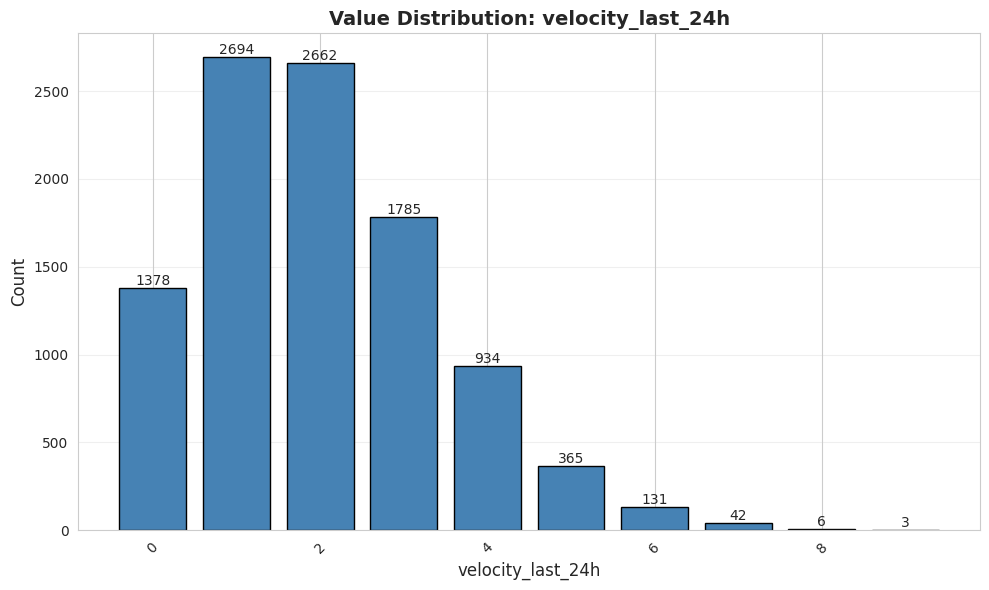

In [82]:
import matplotlib.pyplot as plt

feature = 'velocity_last_24h'

value_counts = df[feature].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='steelblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel(feature, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title(f'Value Distribution: {feature}', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [83]:
print(df['is_fraud'].value_counts())

is_fraud
0    9849
1     151
Name: count, dtype: int64


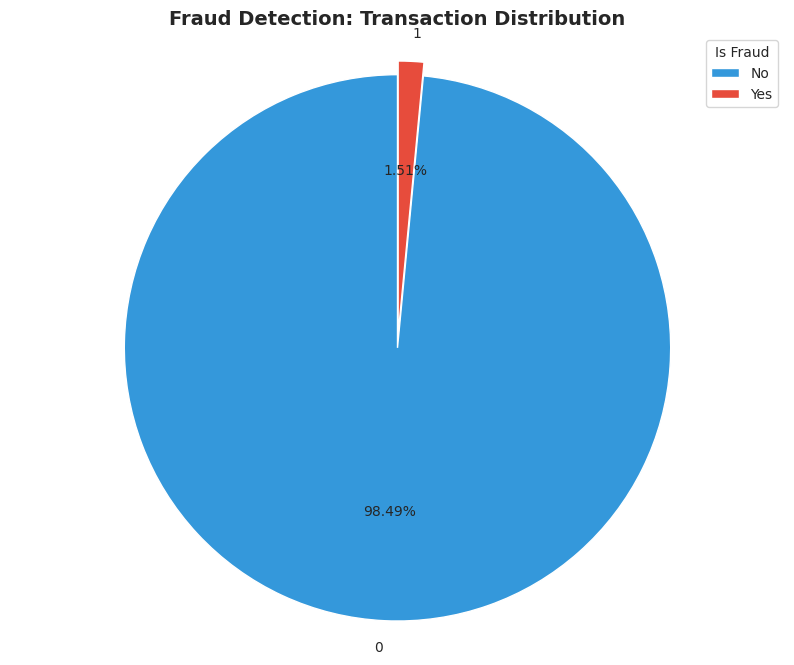

In [84]:
fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(10, 8))
explode = (0.05, 0)

plt.pie(fraud_counts.values, 
        labels=fraud_counts.index,
        autopct='%1.2f%%',
        startangle=90,
        explode=explode,
        shadow=False,
        colors=['#3498db', '#e74c3c'])

plt.title('Fraud Detection: Transaction Distribution', fontsize=14, fontweight='bold')
plt.legend(['No','Yes'], title="Is Fraud", loc="best")
plt.axis('equal')
plt.show()

# Data Preprocessing

## 3.1 Data Cleaning

### Steps:

* Check for missing (null) values in every feature.
* Check for duplicate records and remove them.
* Validate data ranges (e.g. negative transaction amount).

In [85]:
df.isna().count()

transaction_id         10000
amount                 10000
transaction_hour       10000
merchant_category      10000
foreign_transaction    10000
location_mismatch      10000
device_trust_score     10000
velocity_last_24h      10000
cardholder_age         10000
is_fraud               10000
dtype: int64

In [86]:
duplicate = df[df.duplicated()]

display(duplicate)

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud


In [87]:
df['merchant_category'].value_counts()

merchant_category
Food           2093
Clothing       2050
Travel         1990
Grocery        1944
Electronics    1923
Name: count, dtype: int64

In [88]:
df['velocity_last_24h'].value_counts()

velocity_last_24h
1    2694
2    2662
3    1785
0    1378
4     934
5     365
6     131
7      42
8       6
9       3
Name: count, dtype: int64

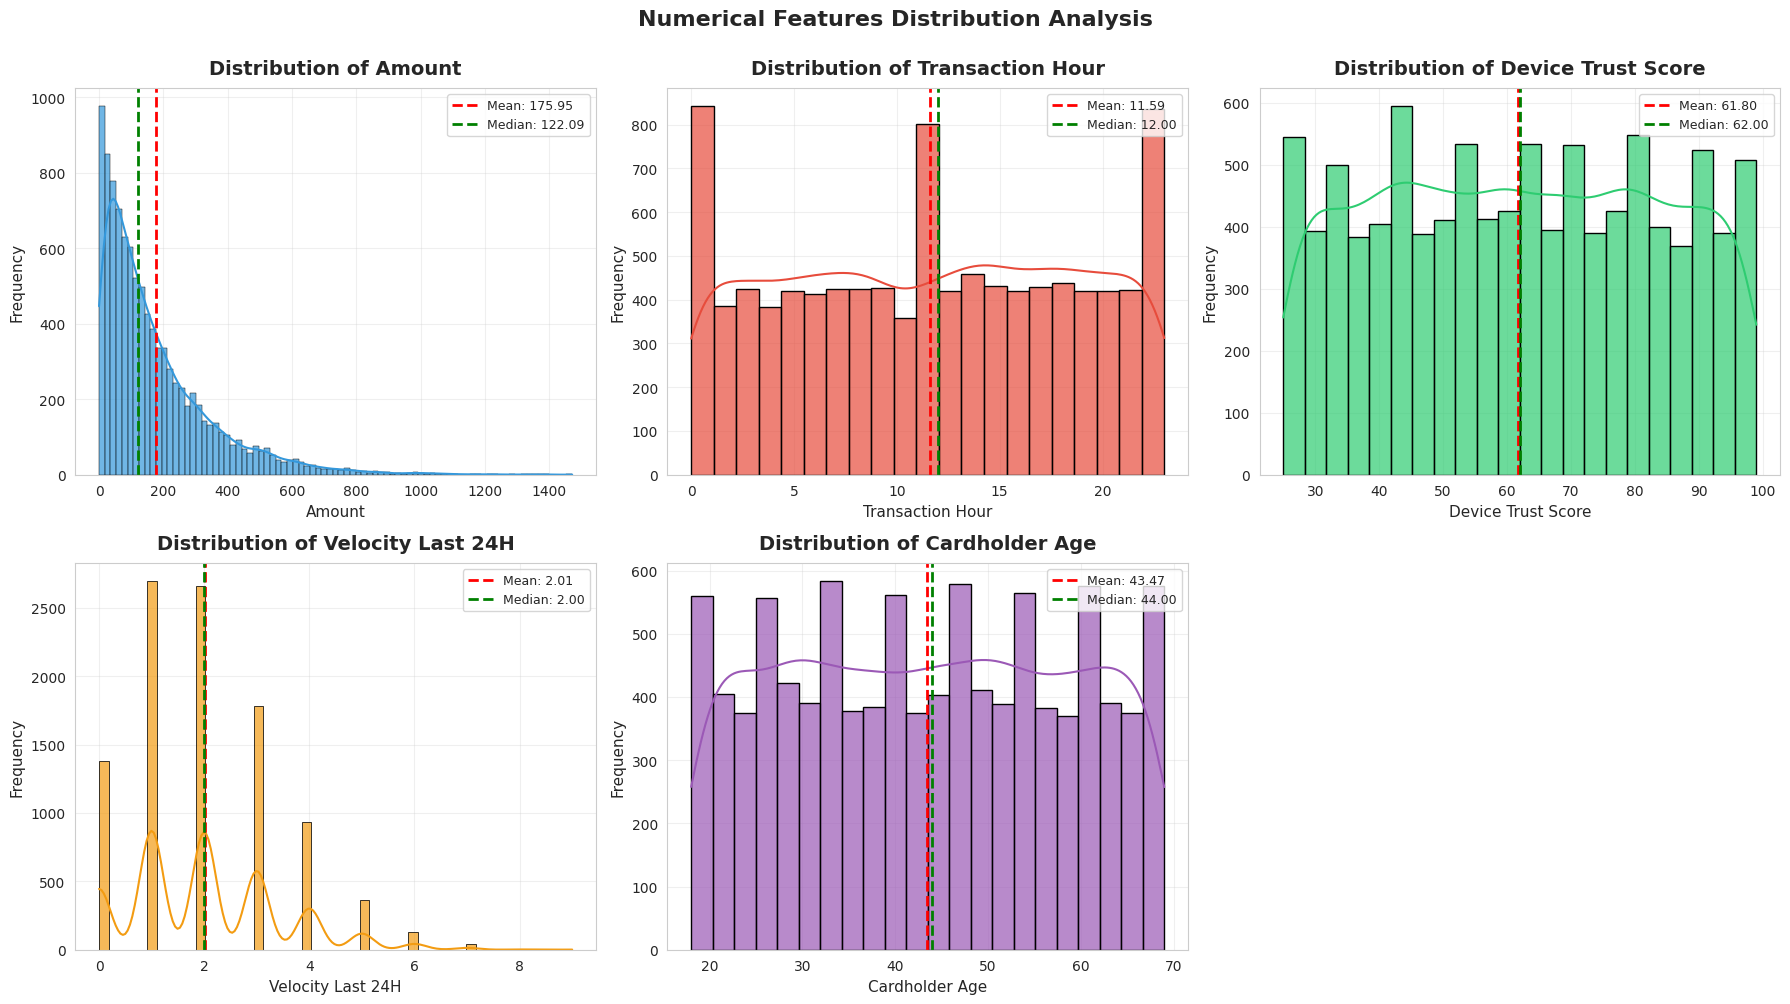

In [89]:
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

num_cols = [
    "amount", "transaction_hour", "device_trust_score",
    "velocity_last_24h", "cardholder_age"
]

# Create subplots - all in one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Define a nice color palette
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, col in enumerate(num_cols):
    # Create histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[idx], 
                 color=colors[idx], edgecolor='black', alpha=0.7)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    axes[idx].axvline(mean_val, color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Styling
    axes[idx].set_title(f'Distribution of {col.replace("_", " ").title()}', 
                        fontsize=14, fontweight='bold', pad=10)
    axes[idx].set_xlabel(col.replace("_", " ").title(), fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].legend(loc='upper right', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

# Remove the extra subplot
fig.delaxes(axes[5])

plt.suptitle('Numerical Features Distribution Analysis', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 3.2 Data Transformation

### Steps:

* Normalize transaction amount.
* Encode Merchant Category.

In [90]:
df['amount_minmax'] = df['amount'].copy()

# Apply Min-Max scaling
scaler = MinMaxScaler()
df['amount_minmax'] = scaler.fit_transform(df[['amount']])

print("Original amount stats:")
print(df['amount'].describe())
print("\nNormalized amount stats:")
print(df['amount_minmax'].describe())

Original amount stats:
count    10000.000000
mean       175.949849
std        175.392827
min          0.000000
25%         50.905000
50%        122.095000
75%        242.480000
max       1471.040000
Name: amount, dtype: float64

Normalized amount stats:
count    10000.000000
mean         0.119609
std          0.119230
min          0.000000
25%          0.034605
50%          0.082999
75%          0.164836
max          1.000000
Name: amount_minmax, dtype: float64


In [91]:
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['merchant_category'])

print("Original vs Encoded:")
print(df[['merchant_category', 'category_encoded']].head(10))
print("\nMapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

Original vs Encoded:
  merchant_category  category_encoded
0       Electronics                 1
1            Travel                 4
2           Grocery                 3
3           Grocery                 3
4              Food                 2
5          Clothing                 0
6            Travel                 4
7       Electronics                 1
8           Grocery                 3
9           Grocery                 3

Mapping:
{'Clothing': np.int64(0), 'Electronics': np.int64(1), 'Food': np.int64(2), 'Grocery': np.int64(3), 'Travel': np.int64(4)}


In [92]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,amount_minmax,category_encoded
0,1,84.47,22,Electronics,0,0,66,3,40,0,0.057422,1
1,2,541.82,3,Travel,1,0,87,1,64,0,0.368324,4
2,3,237.01,17,Grocery,0,0,49,1,61,0,0.161117,3
3,4,164.33,4,Grocery,0,1,72,3,34,0,0.111710,3
4,5,30.53,15,Food,0,0,79,0,44,0,0.020754,2


In [93]:
df['amount'] = df['amount_minmax']
df['merchant_category'] = df['category_encoded']
df.drop(columns=['merchant_category','amount'])

,transaction_id,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,amount_minmax,category_encoded
0,1,22,0,0,66,3,40,0,0.057422,1
1,2,3,1,0,87,1,64,0,0.368324,4
2,3,17,0,0,49,1,61,0,0.161117,3
3,4,4,0,1,72,3,34,0,0.111710,3
4,5,15,0,0,79,0,44,0,0.020754,2
...,...,...,...,...,...,...,...,...,...,...
9995,9996,22,0,0,99,4,37,0,0.238546,2
9996,9997,5,0,0,70,3,25,0,0.278742,0
9997,9998,21,0,0,44,2,45,0,0.358760,1
9998,9999,2,0,0,38,0,37,0,0.061997,1


In [94]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,amount_minmax,category_encoded
0,1,0.057422,22,1,0,0,66,3,40,0,0.057422,1
1,2,0.368324,3,4,1,0,87,1,64,0,0.368324,4
2,3,0.161117,17,3,0,0,49,1,61,0,0.161117,3
3,4,0.111710,4,3,0,1,72,3,34,0,0.111710,3
4,5,0.020754,15,2,0,0,79,0,44,0,0.020754,2


## 3.3 Data Reduction

### Steps:

* Identify irrelevant or redundant features.
* Remove features with very low variance.
* Apply feature selection techniques: Correlation analysis

In [96]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [97]:
X.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,amount_minmax,category_encoded
0,1,0.057422,22,1,0,0,66,3,40,0.057422,1
1,2,0.368324,3,4,1,0,87,1,64,0.368324,4
2,3,0.161117,17,3,0,0,49,1,61,0.161117,3
3,4,0.111710,4,3,0,1,72,3,34,0.111710,3
4,5,0.020754,15,2,0,0,79,0,44,0.020754,2


In [98]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2,   # 0.25 × 0.8 = 0.2
    stratify=y_temp,
    random_state=42
)


In [99]:
irrelevant_cols = [
    col for col in X_train.columns
    if 'id' in col.lower() or 'index' in col.lower()
]

X_train = X_train.drop(columns=irrelevant_cols)

In [100]:
X_train.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,amount_minmax,category_encoded
5635,0.007179,9,0,0,1,93,1,48,0.007179,0
4007,0.064240,9,2,0,1,64,2,50,0.064240,2
1011,0.537851,6,4,0,1,48,4,25,0.537851,4
8687,0.011128,18,3,0,0,52,3,46,0.011128,3
3450,0.074220,6,3,0,0,87,2,52,0.074220,3


In [101]:
vt = VarianceThreshold(threshold=0)
X_vt = vt.fit_transform(X_train)

kept_features = X_train.columns[vt.get_support()]
X_train = pd.DataFrame(X_vt, columns=kept_features)

In [102]:
X_train.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,amount_minmax,category_encoded
0,0.007179,9.0,0.0,0.0,1.0,93.0,1.0,48.0,0.007179,0.0
1,0.064240,9.0,2.0,0.0,1.0,64.0,2.0,50.0,0.064240,2.0
2,0.537851,6.0,4.0,0.0,1.0,48.0,4.0,25.0,0.537851,4.0
3,0.011128,18.0,3.0,0.0,0.0,52.0,3.0,46.0,0.011128,3.0
4,0.074220,6.0,3.0,0.0,0.0,87.0,2.0,52.0,0.074220,3.0


In [103]:
corr_matrix = X_train.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [
    column for column in upper.columns
    if any(upper[column] > 0.9)
]

X_train = X_train.drop(columns=to_drop)

In [104]:
X_train.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age
0,0.007179,9.0,0.0,0.0,1.0,93.0,1.0,48.0
1,0.064240,9.0,2.0,0.0,1.0,64.0,2.0,50.0
2,0.537851,6.0,4.0,0.0,1.0,48.0,4.0,25.0
3,0.011128,18.0,3.0,0.0,0.0,52.0,3.0,46.0
4,0.074220,6.0,3.0,0.0,0.0,87.0,2.0,52.0


## Handling Class Imbalance

### Steps:

* Verify imbalance ratio again.
* Choose imbalance technique: Oversampling (e.g. SMOTE)

In [105]:
print(y_train.value_counts())

is_fraud
0    6303
1      97
Name: count, dtype: int64


In [106]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train.value_counts()

is_fraud
0    6303
1    6303
Name: count, dtype: int64

# Big Data Component-MongoDB
## Why MongoDB?
* Handles large transaction volumes
* Schema-flexible (different transaction attributes)
* Fast filtering & querying (important for fraud analysis)

## Transaction Document Structure

Each transaction = one document

In [68]:
!pip install pymongo

## Connect to MongoDB & Load dataset (CSV → MongoDB)

In [111]:
from pymongo import MongoClient
from pymongo.server_api import ServerApi

In [ ]:
uri = "mongodb+srv://<usr_username>:<usr_password>@cluster0.fwx1c3u.mongodb.net/?appName=Cluster0"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [ ]:
client = MongoClient(
    "mongodb+srv://<usr_username>:<usr_password>@cluster0.fwx1c3u.mongodb.net/fraud_detection_db?retryWrites=true&w=majority"
)
db_big_data = client["fraud_detection_db"]
collection = db_big_data["transactions"]


In [136]:
df_big_data = pd.read_csv("/kaggle/input/credit-cards/credit_card_fraud_10k.csv")

In [138]:
records = df_big_data.to_dict(orient="records")

## Inserting csv into collection called "Transaction" in fraud_detection_db database on mongoDB

In [139]:
collection.insert_many(records)

InsertManyResult([ObjectId('6952c1fa9f453327335c095a'), ObjectId('6952c1fa9f453327335c095b'), ObjectId('6952c1fa9f453327335c095c'), ObjectId('6952c1fa9f453327335c095d'), ObjectId('6952c1fa9f453327335c095e'), ObjectId('6952c1fa9f453327335c095f'), ObjectId('6952c1fa9f453327335c0960'), ObjectId('6952c1fa9f453327335c0961'), ObjectId('6952c1fa9f453327335c0962'), ObjectId('6952c1fa9f453327335c0963'), ObjectId('6952c1fa9f453327335c0964'), ObjectId('6952c1fa9f453327335c0965'), ObjectId('6952c1fa9f453327335c0966'), ObjectId('6952c1fa9f453327335c0967'), ObjectId('6952c1fa9f453327335c0968'), ObjectId('6952c1fa9f453327335c0969'), ObjectId('6952c1fa9f453327335c096a'), ObjectId('6952c1fa9f453327335c096b'), ObjectId('6952c1fa9f453327335c096c'), ObjectId('6952c1fa9f453327335c096d'), ObjectId('6952c1fa9f453327335c096e'), ObjectId('6952c1fa9f453327335c096f'), ObjectId('6952c1fa9f453327335c0970'), ObjectId('6952c1fa9f453327335c0971'), ObjectId('6952c1fa9f453327335c0972'), ObjectId('6952c1fa9f453327335c09

## Writing some Queries

### 4.1 Retrieve ALL fraud cases

In [154]:
fraud_cases = collection.find({"is_fraud": 1})

for case in fraud_cases:
    display(case)


{'_id': ObjectId('6952c1fa9f453327335c0993'),
 'transaction_id': 58,
 'amount': 39.26,
 'transaction_hour': 11,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 34,
 'velocity_last_24h': 3,
 'cardholder_age': 45,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c09d3'),
 'transaction_id': 122,
 'amount': 407.56,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 2,
 'cardholder_age': 34,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c09d5'),
 'transaction_id': 124,
 'amount': 20.99,
 'transaction_hour': 15,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 39,
 'velocity_last_24h': 2,
 'cardholder_age': 19,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0a7a'),
 'transaction_id': 289,
 'amount': 60.77,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 51,
 'velocity_last_24h': 5,
 'cardholder_age': 38,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0ad3'),
 'transaction_id': 378,
 'amount': 4.24,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 5,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0aeb'),
 'transaction_id': 402,
 'amount': 419.12,
 'transaction_hour': 8,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 82,
 'velocity_last_24h': 6,
 'cardholder_age': 18,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b0d'),
 'transaction_id': 436,
 'amount': 217.3,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 6,
 'cardholder_age': 59,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b15'),
 'transaction_id': 444,
 'amount': 83.35,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 2,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b74'),
 'transaction_id': 539,
 'amount': 107.79,
 'transaction_hour': 3,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 5,
 'cardholder_age': 18,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b81'),
 'transaction_id': 552,
 'amount': 344.12,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 3,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0ba0'),
 'transaction_id': 583,
 'amount': 122.13,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 1,
 'cardholder_age': 35,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0bc3'),
 'transaction_id': 618,
 'amount': 58.35,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 29,
 'velocity_last_24h': 4,
 'cardholder_age': 49,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0bdf'),
 'transaction_id': 646,
 'amount': 398.17,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 72,
 'velocity_last_24h': 2,
 'cardholder_age': 62,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0be9'),
 'transaction_id': 656,
 'amount': 24.57,
 'transaction_hour': 9,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 55,
 'velocity_last_24h': 6,
 'cardholder_age': 27,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0c5c'),
 'transaction_id': 771,
 'amount': 21.1,
 'transaction_hour': 3,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 2,
 'cardholder_age': 37,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0cb5'),
 'transaction_id': 860,
 'amount': 12.23,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 3,
 'cardholder_age': 66,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0d49'),
 'transaction_id': 1008,
 'amount': 340.52,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 29,
 'velocity_last_24h': 1,
 'cardholder_age': 31,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0daa'),
 'transaction_id': 1105,
 'amount': 950.41,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 70,
 'velocity_last_24h': 2,
 'cardholder_age': 60,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0e73'),
 'transaction_id': 1306,
 'amount': 368.59,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 3,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0e8f'),
 'transaction_id': 1334,
 'amount': 1009.55,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 0,
 'cardholder_age': 27,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0e94'),
 'transaction_id': 1339,
 'amount': 13.49,
 'transaction_hour': 5,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 6,
 'cardholder_age': 30,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0eea'),
 'transaction_id': 1425,
 'amount': 776.66,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 4,
 'cardholder_age': 56,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0f63'),
 'transaction_id': 1546,
 'amount': 118.94,
 'transaction_hour': 3,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 5,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0f66'),
 'transaction_id': 1549,
 'amount': 7.99,
 'transaction_hour': 2,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 3,
 'cardholder_age': 37,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0f6d'),
 'transaction_id': 1556,
 'amount': 42.9,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 1,
 'cardholder_age': 62,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0fb1'),
 'transaction_id': 1624,
 'amount': 569.02,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 49,
 'velocity_last_24h': 2,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0fbc'),
 'transaction_id': 1635,
 'amount': 471.55,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 27,
 'velocity_last_24h': 3,
 'cardholder_age': 63,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0fed'),
 'transaction_id': 1684,
 'amount': 311.16,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 0,
 'cardholder_age': 38,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0ffe'),
 'transaction_id': 1701,
 'amount': 607.71,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 1,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1019'),
 'transaction_id': 1728,
 'amount': 1028.32,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 2,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c110e'),
 'transaction_id': 1973,
 'amount': 57.41,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 26,
 'velocity_last_24h': 1,
 'cardholder_age': 18,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11a4'),
 'transaction_id': 2123,
 'amount': 614.72,
 'transaction_hour': 8,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 6,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11bc'),
 'transaction_id': 2147,
 'amount': 110.67,
 'transaction_hour': 2,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 43,
 'velocity_last_24h': 5,
 'cardholder_age': 21,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11e7'),
 'transaction_id': 2190,
 'amount': 196.84,
 'transaction_hour': 6,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 75,
 'velocity_last_24h': 5,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11fa'),
 'transaction_id': 2209,
 'amount': 62.21,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 30,
 'velocity_last_24h': 0,
 'cardholder_age': 58,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c121e'),
 'transaction_id': 2245,
 'amount': 348.45,
 'transaction_hour': 2,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 99,
 'velocity_last_24h': 5,
 'cardholder_age': 30,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c123e'),
 'transaction_id': 2277,
 'amount': 244.98,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 3,
 'cardholder_age': 28,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1244'),
 'transaction_id': 2283,
 'amount': 115.13,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 1,
 'cardholder_age': 24,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1245'),
 'transaction_id': 2284,
 'amount': 8.41,
 'transaction_hour': 1,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 5,
 'cardholder_age': 30,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c124b'),
 'transaction_id': 2290,
 'amount': 39.29,
 'transaction_hour': 2,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 1,
 'cardholder_age': 56,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1322'),
 'transaction_id': 2505,
 'amount': 40.27,
 'transaction_hour': 13,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 1,
 'cardholder_age': 57,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c133b'),
 'transaction_id': 2530,
 'amount': 1103.19,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 0,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c136f'),
 'transaction_id': 2582,
 'amount': 395.13,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 5,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c13a0'),
 'transaction_id': 2631,
 'amount': 180.29,
 'transaction_hour': 3,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 33,
 'velocity_last_24h': 2,
 'cardholder_age': 33,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c151a'),
 'transaction_id': 3009,
 'amount': 201.77,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 43,
 'velocity_last_24h': 1,
 'cardholder_age': 49,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1551'),
 'transaction_id': 3064,
 'amount': 175.9,
 'transaction_hour': 6,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 30,
 'velocity_last_24h': 7,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c155e'),
 'transaction_id': 3077,
 'amount': 527.84,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 0,
 'cardholder_age': 51,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1582'),
 'transaction_id': 3113,
 'amount': 225.35,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 7,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c159d'),
 'transaction_id': 3140,
 'amount': 12.76,
 'transaction_hour': 1,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 6,
 'cardholder_age': 58,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c15db'),
 'transaction_id': 3202,
 'amount': 125.9,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 45,
 'velocity_last_24h': 5,
 'cardholder_age': 55,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c15e0'),
 'transaction_id': 3207,
 'amount': 352.32,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 2,
 'cardholder_age': 37,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c15e8'),
 'transaction_id': 3215,
 'amount': 46.95,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 55,
 'velocity_last_24h': 2,
 'cardholder_age': 50,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c163e'),
 'transaction_id': 3301,
 'amount': 102.28,
 'transaction_hour': 2,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 2,
 'cardholder_age': 48,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c169c'),
 'transaction_id': 3395,
 'amount': 416.2,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 2,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c169f'),
 'transaction_id': 3398,
 'amount': 335.43,
 'transaction_hour': 20,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 29,
 'velocity_last_24h': 2,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c172e'),
 'transaction_id': 3541,
 'amount': 42.55,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 5,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c175c'),
 'transaction_id': 3587,
 'amount': 108.92,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 7,
 'cardholder_age': 46,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c179d'),
 'transaction_id': 3652,
 'amount': 91.31,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 33,
 'velocity_last_24h': 3,
 'cardholder_age': 33,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c17a4'),
 'transaction_id': 3659,
 'amount': 171.87,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 6,
 'cardholder_age': 45,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c17d4'),
 'transaction_id': 3707,
 'amount': 241.83,
 'transaction_hour': 19,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 35,
 'velocity_last_24h': 5,
 'cardholder_age': 25,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18ac'),
 'transaction_id': 3923,
 'amount': 275.26,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 2,
 'cardholder_age': 69,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18b9'),
 'transaction_id': 3936,
 'amount': 142.32,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 62,
 'velocity_last_24h': 5,
 'cardholder_age': 46,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18c0'),
 'transaction_id': 3943,
 'amount': 15.82,
 'transaction_hour': 21,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 34,
 'velocity_last_24h': 5,
 'cardholder_age': 23,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18c1'),
 'transaction_id': 3944,
 'amount': 89.89,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 26,
 'velocity_last_24h': 1,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18cd'),
 'transaction_id': 3956,
 'amount': 365.05,
 'transaction_hour': 3,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 3,
 'cardholder_age': 38,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18f1'),
 'transaction_id': 3992,
 'amount': 42.69,
 'transaction_hour': 23,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 39,
 'velocity_last_24h': 4,
 'cardholder_age': 46,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1905'),
 'transaction_id': 4012,
 'amount': 89.54,
 'transaction_hour': 18,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 37,
 'velocity_last_24h': 5,
 'cardholder_age': 67,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c192b'),
 'transaction_id': 4050,
 'amount': 40.51,
 'transaction_hour': 3,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 1,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c193b'),
 'transaction_id': 4066,
 'amount': 19.53,
 'transaction_hour': 19,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 39,
 'velocity_last_24h': 6,
 'cardholder_age': 40,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1988'),
 'transaction_id': 4143,
 'amount': 17.85,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 3,
 'cardholder_age': 40,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1997'),
 'transaction_id': 4158,
 'amount': 342.87,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 55,
 'velocity_last_24h': 2,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c19ff'),
 'transaction_id': 4262,
 'amount': 386.63,
 'transaction_hour': 19,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 39,
 'velocity_last_24h': 5,
 'cardholder_age': 63,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1a29'),
 'transaction_id': 4304,
 'amount': 159.01,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 33,
 'velocity_last_24h': 1,
 'cardholder_age': 54,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1a53'),
 'transaction_id': 4346,
 'amount': 78.4,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 2,
 'cardholder_age': 35,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1ad5'),
 'transaction_id': 4476,
 'amount': 119.03,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 5,
 'cardholder_age': 18,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1aff'),
 'transaction_id': 4518,
 'amount': 408.4,
 'transaction_hour': 1,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 6,
 'cardholder_age': 46,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1c02'),
 'transaction_id': 4777,
 'amount': 0.11,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 1,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1cc3'),
 'transaction_id': 4970,
 'amount': 100.27,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 47,
 'velocity_last_24h': 5,
 'cardholder_age': 23,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1d21'),
 'transaction_id': 5064,
 'amount': 71.52,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 3,
 'cardholder_age': 28,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1d7a'),
 'transaction_id': 5153,
 'amount': 431.1,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 3,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1dca'),
 'transaction_id': 5233,
 'amount': 217.37,
 'transaction_hour': 20,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 30,
 'velocity_last_24h': 2,
 'cardholder_age': 55,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e38'),
 'transaction_id': 5343,
 'amount': 17.24,
 'transaction_hour': 17,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 30,
 'velocity_last_24h': 2,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e44'),
 'transaction_id': 5355,
 'amount': 137.18,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 29,
 'velocity_last_24h': 2,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e78'),
 'transaction_id': 5407,
 'amount': 611.98,
 'transaction_hour': 13,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 0,
 'cardholder_age': 53,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e79'),
 'transaction_id': 5408,
 'amount': 105.48,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 27,
 'velocity_last_24h': 3,
 'cardholder_age': 59,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e8c'),
 'transaction_id': 5427,
 'amount': 737.06,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 65,
 'velocity_last_24h': 5,
 'cardholder_age': 51,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1ea1'),
 'transaction_id': 5448,
 'amount': 174.28,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 90,
 'velocity_last_24h': 6,
 'cardholder_age': 48,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1efa'),
 'transaction_id': 5537,
 'amount': 28.31,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 52,
 'velocity_last_24h': 4,
 'cardholder_age': 27,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1f12'),
 'transaction_id': 5561,
 'amount': 75.06,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 3,
 'cardholder_age': 57,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1f26'),
 'transaction_id': 5581,
 'amount': 7.34,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 32,
 'velocity_last_24h': 1,
 'cardholder_age': 34,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1f9c'),
 'transaction_id': 5699,
 'amount': 745.34,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 76,
 'velocity_last_24h': 5,
 'cardholder_age': 40,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1fa5'),
 'transaction_id': 5708,
 'amount': 19.66,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 44,
 'velocity_last_24h': 5,
 'cardholder_age': 67,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1fe3'),
 'transaction_id': 5770,
 'amount': 437.9,
 'transaction_hour': 3,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 3,
 'cardholder_age': 53,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1fea'),
 'transaction_id': 5777,
 'amount': 177.39,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 5,
 'cardholder_age': 53,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c203a'),
 'transaction_id': 5857,
 'amount': 27.96,
 'transaction_hour': 5,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 27,
 'velocity_last_24h': 1,
 'cardholder_age': 35,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c207c'),
 'transaction_id': 5923,
 'amount': 34.58,
 'transaction_hour': 4,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 38,
 'velocity_last_24h': 2,
 'cardholder_age': 37,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2083'),
 'transaction_id': 5930,
 'amount': 401.4,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 0,
 'cardholder_age': 28,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c20b3'),
 'transaction_id': 5978,
 'amount': 29.23,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 25,
 'velocity_last_24h': 2,
 'cardholder_age': 58,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c20cb'),
 'transaction_id': 6002,
 'amount': 34.06,
 'transaction_hour': 23,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 5,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2167'),
 'transaction_id': 6158,
 'amount': 231.29,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 26,
 'velocity_last_24h': 5,
 'cardholder_age': 35,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2179'),
 'transaction_id': 6176,
 'amount': 134.76,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 4,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c219e'),
 'transaction_id': 6213,
 'amount': 92.24,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 39,
 'velocity_last_24h': 0,
 'cardholder_age': 32,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c228d'),
 'transaction_id': 6452,
 'amount': 1036.82,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 0,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2296'),
 'transaction_id': 6461,
 'amount': 55.48,
 'transaction_hour': 3,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 40,
 'velocity_last_24h': 2,
 'cardholder_age': 55,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c22ad'),
 'transaction_id': 6484,
 'amount': 1.82,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 29,
 'velocity_last_24h': 2,
 'cardholder_age': 66,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c22dd'),
 'transaction_id': 6532,
 'amount': 417.43,
 'transaction_hour': 3,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 5,
 'cardholder_age': 35,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c22eb'),
 'transaction_id': 6546,
 'amount': 16.21,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 39,
 'velocity_last_24h': 6,
 'cardholder_age': 67,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c22fe'),
 'transaction_id': 6565,
 'amount': 30.28,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 5,
 'cardholder_age': 38,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2399'),
 'transaction_id': 6720,
 'amount': 61.95,
 'transaction_hour': 3,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 30,
 'velocity_last_24h': 4,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c23c9'),
 'transaction_id': 6768,
 'amount': 47.58,
 'transaction_hour': 1,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 33,
 'velocity_last_24h': 0,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c23d7'),
 'transaction_id': 6782,
 'amount': 118.37,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 60,
 'velocity_last_24h': 5,
 'cardholder_age': 57,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2443'),
 'transaction_id': 6890,
 'amount': 128.4,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 35,
 'velocity_last_24h': 3,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2483'),
 'transaction_id': 6954,
 'amount': 1.28,
 'transaction_hour': 14,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 5,
 'cardholder_age': 63,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c254a'),
 'transaction_id': 7153,
 'amount': 590.37,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 1,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c259c'),
 'transaction_id': 7235,
 'amount': 74.4,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 1,
 'cardholder_age': 57,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c25c8'),
 'transaction_id': 7279,
 'amount': 255.67,
 'transaction_hour': 19,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 5,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2658'),
 'transaction_id': 7423,
 'amount': 89.08,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 29,
 'velocity_last_24h': 1,
 'cardholder_age': 51,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2695'),
 'transaction_id': 7484,
 'amount': 123.45,
 'transaction_hour': 0,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 0,
 'cardholder_age': 30,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c26ed'),
 'transaction_id': 7572,
 'amount': 140.68,
 'transaction_hour': 3,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 1,
 'cardholder_age': 63,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2700'),
 'transaction_id': 7591,
 'amount': 38.38,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 39,
 'velocity_last_24h': 3,
 'cardholder_age': 51,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2739'),
 'transaction_id': 7648,
 'amount': 40.2,
 'transaction_hour': 10,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 38,
 'velocity_last_24h': 4,
 'cardholder_age': 59,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2742'),
 'transaction_id': 7657,
 'amount': 226.79,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 91,
 'velocity_last_24h': 3,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2791'),
 'transaction_id': 7736,
 'amount': 180.85,
 'transaction_hour': 2,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 26,
 'velocity_last_24h': 5,
 'cardholder_age': 25,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c27ee'),
 'transaction_id': 7829,
 'amount': 148.06,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 55,
 'velocity_last_24h': 5,
 'cardholder_age': 66,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2834'),
 'transaction_id': 7899,
 'amount': 53.64,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 36,
 'velocity_last_24h': 5,
 'cardholder_age': 45,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2859'),
 'transaction_id': 7936,
 'amount': 23.4,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 95,
 'velocity_last_24h': 5,
 'cardholder_age': 23,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2899'),
 'transaction_id': 8000,
 'amount': 19.86,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 78,
 'velocity_last_24h': 7,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c28c2'),
 'transaction_id': 8041,
 'amount': 701.79,
 'transaction_hour': 2,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 94,
 'velocity_last_24h': 1,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c28cb'),
 'transaction_id': 8050,
 'amount': 26.87,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 32,
 'velocity_last_24h': 0,
 'cardholder_age': 21,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c28e1'),
 'transaction_id': 8072,
 'amount': 96.46,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 38,
 'velocity_last_24h': 2,
 'cardholder_age': 60,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2913'),
 'transaction_id': 8122,
 'amount': 178.43,
 'transaction_hour': 3,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 37,
 'velocity_last_24h': 0,
 'cardholder_age': 53,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2919'),
 'transaction_id': 8128,
 'amount': 488.21,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 1,
 'cardholder_age': 33,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2a90'),
 'transaction_id': 8503,
 'amount': 59.29,
 'transaction_hour': 17,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 29,
 'velocity_last_24h': 4,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2aaa'),
 'transaction_id': 8529,
 'amount': 205.12,
 'transaction_hour': 2,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 26,
 'velocity_last_24h': 5,
 'cardholder_age': 45,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2ac8'),
 'transaction_id': 8559,
 'amount': 266.14,
 'transaction_hour': 8,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 5,
 'cardholder_age': 68,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2b0e'),
 'transaction_id': 8629,
 'amount': 60.0,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 25,
 'velocity_last_24h': 2,
 'cardholder_age': 45,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2b6e'),
 'transaction_id': 8725,
 'amount': 361.42,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 5,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2c08'),
 'transaction_id': 8879,
 'amount': 84.19,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 33,
 'velocity_last_24h': 2,
 'cardholder_age': 21,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2c72'),
 'transaction_id': 8985,
 'amount': 2.06,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 5,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2cbd'),
 'transaction_id': 9060,
 'amount': 40.43,
 'transaction_hour': 11,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 5,
 'cardholder_age': 32,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2d64'),
 'transaction_id': 9227,
 'amount': 92.73,
 'transaction_hour': 15,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 26,
 'velocity_last_24h': 3,
 'cardholder_age': 69,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2d83'),
 'transaction_id': 9258,
 'amount': 33.34,
 'transaction_hour': 3,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 33,
 'velocity_last_24h': 4,
 'cardholder_age': 64,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2dc3'),
 'transaction_id': 9322,
 'amount': 388.8,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 0,
 'cardholder_age': 61,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2dcc'),
 'transaction_id': 9331,
 'amount': 214.14,
 'transaction_hour': 23,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 38,
 'velocity_last_24h': 5,
 'cardholder_age': 31,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2e09'),
 'transaction_id': 9392,
 'amount': 1185.07,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 98,
 'velocity_last_24h': 3,
 'cardholder_age': 50,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2e49'),
 'transaction_id': 9456,
 'amount': 53.29,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 33,
 'velocity_last_24h': 5,
 'cardholder_age': 58,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2e90'),
 'transaction_id': 9527,
 'amount': 398.66,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 5,
 'cardholder_age': 61,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2eab'),
 'transaction_id': 9554,
 'amount': 182.65,
 'transaction_hour': 2,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 2,
 'cardholder_age': 28,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2ecd'),
 'transaction_id': 9588,
 'amount': 93.93,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 27,
 'velocity_last_24h': 3,
 'cardholder_age': 69,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2f8d'),
 'transaction_id': 9780,
 'amount': 172.0,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 56,
 'velocity_last_24h': 5,
 'cardholder_age': 24,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c304f'),
 'transaction_id': 9974,
 'amount': 11.22,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 4,
 'cardholder_age': 32,
 'is_fraud': 1}

### 4.2 Filter transactions by amount

In [161]:
high_amount = collection.find({"amount": {"$gt": 1000}})

for amount in high_amount:
    display(amount)

{'_id': ObjectId('6952c1fa9f453327335c169d'),
 'transaction_id': 3396,
 'amount': 1001.1,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 64,
 'velocity_last_24h': 4,
 'cardholder_age': 32,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2020'),
 'transaction_id': 5831,
 'amount': 1004.26,
 'transaction_hour': 23,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 90,
 'velocity_last_24h': 3,
 'cardholder_age': 30,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c0e8f'),
 'transaction_id': 1334,
 'amount': 1009.55,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 0,
 'cardholder_age': 27,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c10d2'),
 'transaction_id': 1913,
 'amount': 1009.57,
 'transaction_hour': 14,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 33,
 'velocity_last_24h': 1,
 'cardholder_age': 48,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c1ac8'),
 'transaction_id': 4463,
 'amount': 1019.26,
 'transaction_hour': 8,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 69,
 'velocity_last_24h': 2,
 'cardholder_age': 62,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c0b6e'),
 'transaction_id': 533,
 'amount': 1025.08,
 'transaction_hour': 23,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 42,
 'velocity_last_24h': 2,
 'cardholder_age': 64,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c276e'),
 'transaction_id': 7701,
 'amount': 1027.58,
 'transaction_hour': 4,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 91,
 'velocity_last_24h': 2,
 'cardholder_age': 51,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c1019'),
 'transaction_id': 1728,
 'amount': 1028.32,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 2,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c228d'),
 'transaction_id': 6452,
 'amount': 1036.82,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 0,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0ca9'),
 'transaction_id': 848,
 'amount': 1038.25,
 'transaction_hour': 18,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 65,
 'velocity_last_24h': 0,
 'cardholder_age': 48,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c1b29'),
 'transaction_id': 4560,
 'amount': 1042.64,
 'transaction_hour': 6,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 92,
 'velocity_last_24h': 1,
 'cardholder_age': 45,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2c9e'),
 'transaction_id': 9029,
 'amount': 1045.08,
 'transaction_hour': 14,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 1,
 'cardholder_age': 67,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c0e13'),
 'transaction_id': 1210,
 'amount': 1053.28,
 'transaction_hour': 16,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 84,
 'velocity_last_24h': 0,
 'cardholder_age': 51,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c163f'),
 'transaction_id': 3302,
 'amount': 1056.93,
 'transaction_hour': 18,
 'merchant_category': 'Clothing',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 63,
 'velocity_last_24h': 2,
 'cardholder_age': 35,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c1708'),
 'transaction_id': 3503,
 'amount': 1060.52,
 'transaction_hour': 17,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 35,
 'velocity_last_24h': 2,
 'cardholder_age': 34,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2708'),
 'transaction_id': 7599,
 'amount': 1073.0,
 'transaction_hour': 13,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 78,
 'velocity_last_24h': 3,
 'cardholder_age': 22,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c16a9'),
 'transaction_id': 3408,
 'amount': 1087.95,
 'transaction_hour': 11,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 52,
 'velocity_last_24h': 1,
 'cardholder_age': 66,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c1f13'),
 'transaction_id': 5562,
 'amount': 1091.31,
 'transaction_hour': 18,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 74,
 'velocity_last_24h': 2,
 'cardholder_age': 18,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c19fa'),
 'transaction_id': 4257,
 'amount': 1097.38,
 'transaction_hour': 21,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 4,
 'cardholder_age': 19,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c133b'),
 'transaction_id': 2530,
 'amount': 1103.19,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 0,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0d78'),
 'transaction_id': 1055,
 'amount': 1112.79,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 80,
 'velocity_last_24h': 1,
 'cardholder_age': 37,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c10fc'),
 'transaction_id': 1955,
 'amount': 1152.99,
 'transaction_hour': 20,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 50,
 'velocity_last_24h': 4,
 'cardholder_age': 53,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2ddb'),
 'transaction_id': 9346,
 'amount': 1161.2,
 'transaction_hour': 20,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 0,
 'cardholder_age': 47,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c22d7'),
 'transaction_id': 6526,
 'amount': 1177.86,
 'transaction_hour': 23,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 55,
 'velocity_last_24h': 3,
 'cardholder_age': 45,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2e09'),
 'transaction_id': 9392,
 'amount': 1185.07,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 98,
 'velocity_last_24h': 3,
 'cardholder_age': 50,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e25'),
 'transaction_id': 5324,
 'amount': 1209.52,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 68,
 'velocity_last_24h': 3,
 'cardholder_age': 51,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c16a4'),
 'transaction_id': 3403,
 'amount': 1225.04,
 'transaction_hour': 21,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 85,
 'velocity_last_24h': 1,
 'cardholder_age': 21,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2679'),
 'transaction_id': 7456,
 'amount': 1227.01,
 'transaction_hour': 9,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 52,
 'velocity_last_24h': 3,
 'cardholder_age': 29,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c23c0'),
 'transaction_id': 6759,
 'amount': 1285.21,
 'transaction_hour': 10,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 63,
 'velocity_last_24h': 2,
 'cardholder_age': 54,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c1ff6'),
 'transaction_id': 5789,
 'amount': 1321.02,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 54,
 'velocity_last_24h': 2,
 'cardholder_age': 64,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c0f12'),
 'transaction_id': 1465,
 'amount': 1339.51,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 89,
 'velocity_last_24h': 0,
 'cardholder_age': 26,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c2145'),
 'transaction_id': 6124,
 'amount': 1354.54,
 'transaction_hour': 23,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 0,
 'cardholder_age': 47,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c3021'),
 'transaction_id': 9928,
 'amount': 1370.04,
 'transaction_hour': 7,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 54,
 'velocity_last_24h': 3,
 'cardholder_age': 30,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c179b'),
 'transaction_id': 3650,
 'amount': 1390.24,
 'transaction_hour': 1,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 43,
 'velocity_last_24h': 1,
 'cardholder_age': 61,
 'is_fraud': 0}

{'_id': ObjectId('6952c1fa9f453327335c0b6d'),
 'transaction_id': 532,
 'amount': 1471.04,
 'transaction_hour': 15,
 'merchant_category': 'Electronics',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 44,
 'velocity_last_24h': 3,
 'cardholder_age': 48,
 'is_fraud': 0}

### 3.3 Fraud + high amount (combined query)

In [160]:
Big_thief = collection.find({
    "is_fraud": 1,
    "amount": {"$gt": 500}
})

for thieves in Big_thief:
    display(thieves)

{'_id': ObjectId('6952c1fa9f453327335c0daa'),
 'transaction_id': 1105,
 'amount': 950.41,
 'transaction_hour': 1,
 'merchant_category': 'Travel',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 70,
 'velocity_last_24h': 2,
 'cardholder_age': 60,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0e8f'),
 'transaction_id': 1334,
 'amount': 1009.55,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 0,
 'cardholder_age': 27,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0eea'),
 'transaction_id': 1425,
 'amount': 776.66,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 4,
 'cardholder_age': 56,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0fb1'),
 'transaction_id': 1624,
 'amount': 569.02,
 'transaction_hour': 1,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 49,
 'velocity_last_24h': 2,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0ffe'),
 'transaction_id': 1701,
 'amount': 607.71,
 'transaction_hour': 3,
 'merchant_category': 'Clothing',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 1,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1019'),
 'transaction_id': 1728,
 'amount': 1028.32,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 2,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11a4'),
 'transaction_id': 2123,
 'amount': 614.72,
 'transaction_hour': 8,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 6,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c133b'),
 'transaction_id': 2530,
 'amount': 1103.19,
 'transaction_hour': 1,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 0,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c155e'),
 'transaction_id': 3077,
 'amount': 527.84,
 'transaction_hour': 2,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 0,
 'cardholder_age': 51,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e78'),
 'transaction_id': 5407,
 'amount': 611.98,
 'transaction_hour': 13,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 0,
 'cardholder_age': 53,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e8c'),
 'transaction_id': 5427,
 'amount': 737.06,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 65,
 'velocity_last_24h': 5,
 'cardholder_age': 51,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1f9c'),
 'transaction_id': 5699,
 'amount': 745.34,
 'transaction_hour': 0,
 'merchant_category': 'Food',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 76,
 'velocity_last_24h': 5,
 'cardholder_age': 40,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c228d'),
 'transaction_id': 6452,
 'amount': 1036.82,
 'transaction_hour': 0,
 'merchant_category': 'Electronics',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 0,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c254a'),
 'transaction_id': 7153,
 'amount': 590.37,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 1,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c28c2'),
 'transaction_id': 8041,
 'amount': 701.79,
 'transaction_hour': 2,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 94,
 'velocity_last_24h': 1,
 'cardholder_age': 20,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2e09'),
 'transaction_id': 9392,
 'amount': 1185.07,
 'transaction_hour': 0,
 'merchant_category': 'Travel',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 98,
 'velocity_last_24h': 3,
 'cardholder_age': 50,
 'is_fraud': 1}

### 4.4 Fraud cases by merchant category

In [169]:
grocery_thief = collection.find({
    "is_fraud": 1,
    "merchant_category": "Grocery"
})

for thieves in grocery_thief:
    display(thieves)

{'_id': ObjectId('6952c1fa9f453327335c09d3'),
 'transaction_id': 122,
 'amount': 407.56,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 2,
 'cardholder_age': 34,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c09d5'),
 'transaction_id': 124,
 'amount': 20.99,
 'transaction_hour': 15,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 39,
 'velocity_last_24h': 2,
 'cardholder_age': 19,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b0d'),
 'transaction_id': 436,
 'amount': 217.3,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 6,
 'cardholder_age': 59,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b15'),
 'transaction_id': 444,
 'amount': 83.35,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 2,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0b81'),
 'transaction_id': 552,
 'amount': 344.12,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 3,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0e8f'),
 'transaction_id': 1334,
 'amount': 1009.55,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 0,
 'cardholder_age': 27,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0e94'),
 'transaction_id': 1339,
 'amount': 13.49,
 'transaction_hour': 5,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 6,
 'cardholder_age': 30,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0eea'),
 'transaction_id': 1425,
 'amount': 776.66,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 4,
 'cardholder_age': 56,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c0f6d'),
 'transaction_id': 1556,
 'amount': 42.9,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 32,
 'velocity_last_24h': 1,
 'cardholder_age': 62,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1019'),
 'transaction_id': 1728,
 'amount': 1028.32,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 27,
 'velocity_last_24h': 2,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c110e'),
 'transaction_id': 1973,
 'amount': 57.41,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 26,
 'velocity_last_24h': 1,
 'cardholder_age': 18,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11a4'),
 'transaction_id': 2123,
 'amount': 614.72,
 'transaction_hour': 8,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 6,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c11e7'),
 'transaction_id': 2190,
 'amount': 196.84,
 'transaction_hour': 6,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 75,
 'velocity_last_24h': 5,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1244'),
 'transaction_id': 2283,
 'amount': 115.13,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 34,
 'velocity_last_24h': 1,
 'cardholder_age': 24,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c136f'),
 'transaction_id': 2582,
 'amount': 395.13,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 38,
 'velocity_last_24h': 5,
 'cardholder_age': 41,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c179d'),
 'transaction_id': 3652,
 'amount': 91.31,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 33,
 'velocity_last_24h': 3,
 'cardholder_age': 33,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c18f1'),
 'transaction_id': 3992,
 'amount': 42.69,
 'transaction_hour': 23,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 39,
 'velocity_last_24h': 4,
 'cardholder_age': 46,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1a53'),
 'transaction_id': 4346,
 'amount': 78.4,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 28,
 'velocity_last_24h': 2,
 'cardholder_age': 35,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1ad5'),
 'transaction_id': 4476,
 'amount': 119.03,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 5,
 'cardholder_age': 18,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1cc3'),
 'transaction_id': 4970,
 'amount': 100.27,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 47,
 'velocity_last_24h': 5,
 'cardholder_age': 23,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1d21'),
 'transaction_id': 5064,
 'amount': 71.52,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 31,
 'velocity_last_24h': 3,
 'cardholder_age': 28,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c1e78'),
 'transaction_id': 5407,
 'amount': 611.98,
 'transaction_hour': 13,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 31,
 'velocity_last_24h': 0,
 'cardholder_age': 53,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c20b3'),
 'transaction_id': 5978,
 'amount': 29.23,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 25,
 'velocity_last_24h': 2,
 'cardholder_age': 58,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c22ad'),
 'transaction_id': 6484,
 'amount': 1.82,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 29,
 'velocity_last_24h': 2,
 'cardholder_age': 66,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c23d7'),
 'transaction_id': 6782,
 'amount': 118.37,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 60,
 'velocity_last_24h': 5,
 'cardholder_age': 57,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c254a'),
 'transaction_id': 7153,
 'amount': 590.37,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 37,
 'velocity_last_24h': 1,
 'cardholder_age': 65,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c259c'),
 'transaction_id': 7235,
 'amount': 74.4,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 1,
 'cardholder_age': 57,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2739'),
 'transaction_id': 7648,
 'amount': 40.2,
 'transaction_hour': 10,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 38,
 'velocity_last_24h': 4,
 'cardholder_age': 59,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2742'),
 'transaction_id': 7657,
 'amount': 226.79,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 91,
 'velocity_last_24h': 3,
 'cardholder_age': 52,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2899'),
 'transaction_id': 8000,
 'amount': 19.86,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 78,
 'velocity_last_24h': 7,
 'cardholder_age': 29,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c28cb'),
 'transaction_id': 8050,
 'amount': 26.87,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 32,
 'velocity_last_24h': 0,
 'cardholder_age': 21,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2a90'),
 'transaction_id': 8503,
 'amount': 59.29,
 'transaction_hour': 17,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 1,
 'device_trust_score': 29,
 'velocity_last_24h': 4,
 'cardholder_age': 44,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2b0e'),
 'transaction_id': 8629,
 'amount': 60.0,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 1,
 'location_mismatch': 0,
 'device_trust_score': 25,
 'velocity_last_24h': 2,
 'cardholder_age': 45,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2b6e'),
 'transaction_id': 8725,
 'amount': 361.42,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 28,
 'velocity_last_24h': 5,
 'cardholder_age': 43,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2c72'),
 'transaction_id': 8985,
 'amount': 2.06,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 36,
 'velocity_last_24h': 5,
 'cardholder_age': 36,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2e49'),
 'transaction_id': 9456,
 'amount': 53.29,
 'transaction_hour': 0,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 33,
 'velocity_last_24h': 5,
 'cardholder_age': 58,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2e90'),
 'transaction_id': 9527,
 'amount': 398.66,
 'transaction_hour': 3,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 0,
 'device_trust_score': 30,
 'velocity_last_24h': 5,
 'cardholder_age': 61,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c2f8d'),
 'transaction_id': 9780,
 'amount': 172.0,
 'transaction_hour': 2,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 56,
 'velocity_last_24h': 5,
 'cardholder_age': 24,
 'is_fraud': 1}

{'_id': ObjectId('6952c1fa9f453327335c304f'),
 'transaction_id': 9974,
 'amount': 11.22,
 'transaction_hour': 1,
 'merchant_category': 'Grocery',
 'foreign_transaction': 0,
 'location_mismatch': 1,
 'device_trust_score': 25,
 'velocity_last_24h': 4,
 'cardholder_age': 32,
 'is_fraud': 1}

## Indexing

### Create indexes

In [171]:
collection.create_index("is_fraud")
collection.create_index("amount")

'amount_1'